# Data analysis: Velib

Author: O. Roustant, INSA Toulouse. February 2022.

We consider the ‘Vélib’ data set, related to the bike sharing system of Paris. The data are loading profiles of the bike stations over one week, collected every hour, from the period Monday 2nd Sept. - Sunday 7th Sept., 2014. The loading profile of a station, or simply loading, is defined as the ratio of number of available bikes divided by the number of bike docks. A loading of 1 means that the station is fully loaded, i.e. all bikes are available. A loading of 0 means that the station is empty, all bikes have been rent.

From the viewpoint of data analysis, the individuals are the stations. The variables are the 168 time steps (hours in the week). The aim is to detect clusters in the data, corresponding to common customer usages. This clustering should then be used to predict the loading profile.


In [1]:
import pandas as pd
path = './Données/'  # si les données sont déjà dans le répertoire courant
loading = pd.read_csv(path+'velibLoading.csv', sep = " ")
loading.head()

FileNotFoundError: [Errno 2] No such file or directory: './Données/velibLoading.csv'

In [ ]:
velibAdds = pd.read_csv(path+'velibAdds.csv', sep = " ")
velibAdds.head()

,longitude,latitude,bonus,names
1,2.377389,48.886300,0,EURYALE DEHAYNIN
2,2.317591,48.890020,0,LEMERCIER
3,2.330447,48.850297,0,MEZIERES RENNES
4,2.271396,48.833734,0,FARMAN
5,2.366897,48.845887,0,QUAI DE LA RAPEE


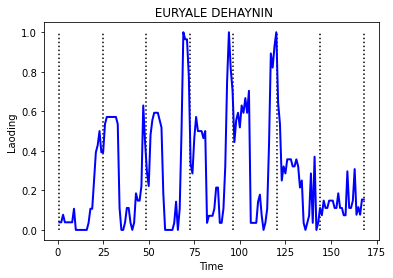

In [ ]:
# Plot the loading of the first station
%matplotlib inline
from pylab import * 
import numpy as np

p = loading.columns.size
Time = np.linspace(1, p, p)
plot(Time, loading.transpose()[1], linewidth = 2, color = 'blue')
xlabel('Time'); ylabel('Laoding'); title(velibAdds.names[1])
vlines(x = np.linspace(1, p, 8), ymin = 0, ymax = 1, colors = "black", linestyle = "dotted")
show()

# Descriptive statistics.

Some ideas : 

1. Draw a matrix of plots of size 4*4, corresponding to the first 16 stations. (Do not forget the vertical lines corresponding to days).
2. Draw the boxplot of the variables, sorted in time order. 
What can you say about the distribution of the variables? 
Position, dispersion, symmetry? Can you see a difference between days?
3. Plot the average hourly loading for each day (on a single graph).
Comments? 
4. Plot the stations coordinates on a 2D map (latitude versus longitude). Use the package ggmap (function 'qmplot') to visualize the average loading for a given hour (6h, 12h, 23h) as a color scale.
Comments ?
5. Use a different color for stations which are located on a hill. (Use the basis 'plot' function, and the function 'qmplot' of R package ggmap).
6. Redo questions 1-3 for the subset of stations which are located on a hill. Same questions for those who are not. Comment?

#### 1. Draw a matrix of plots of size 4*4, corresponding to the first 16 stations. (Do not forget the vertical lines corresponding to days).

In [ ]:
i = 10
type(velibAdds.names)

pandas.core.series.Series

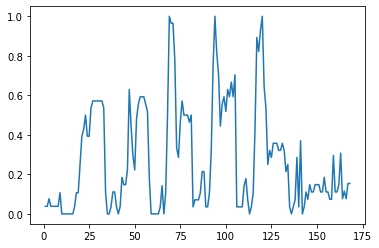

In [ ]:
extraire = loading.transpose()[loading.transpose().columns[0:16]]
plot(Time, extraire[1])

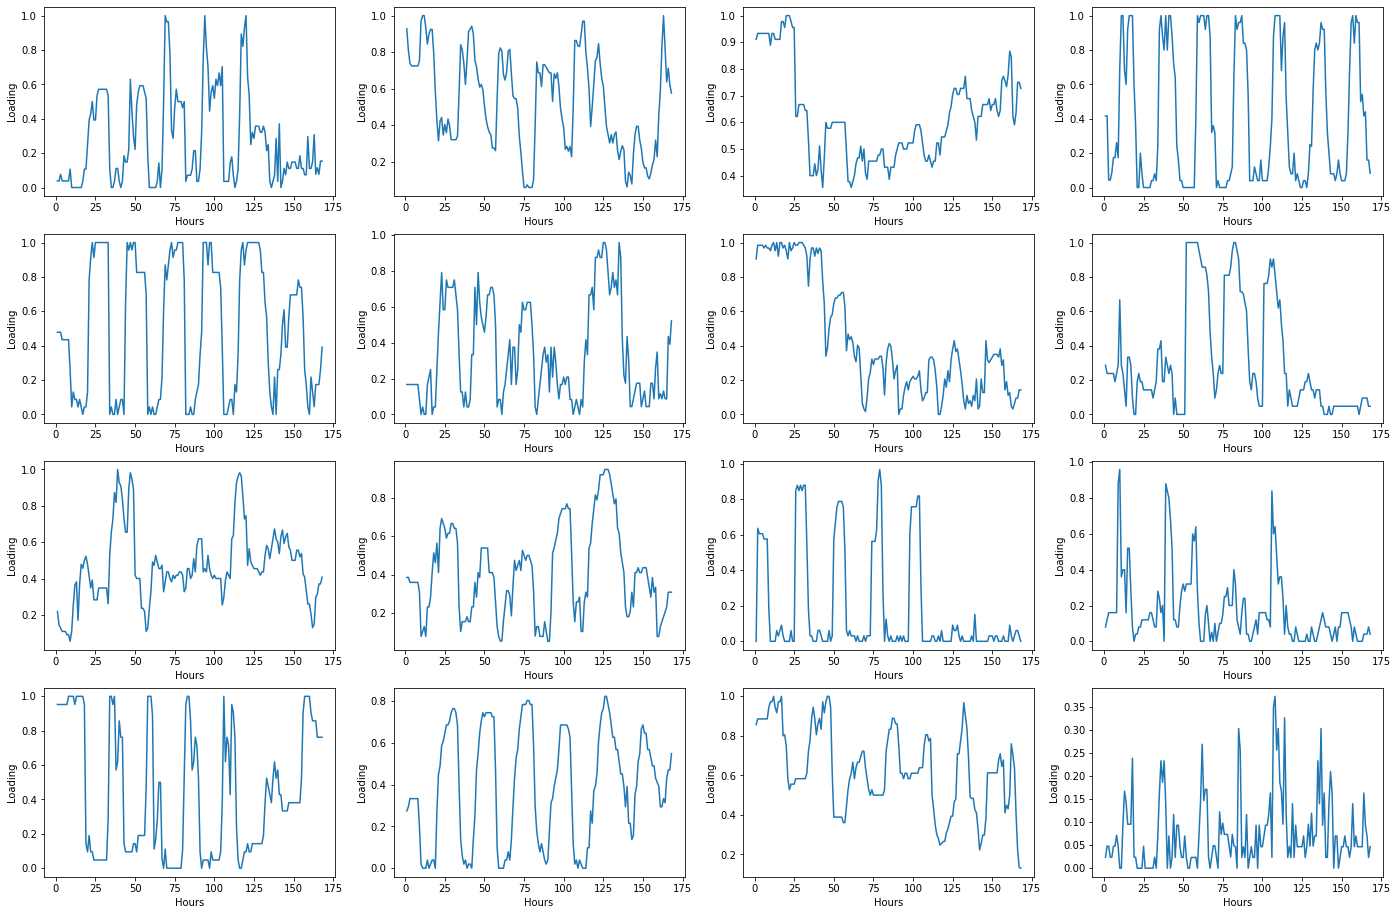

In [ ]:

fig, axs = plt.subplots(4,4, figsize = (24,16))
for i in range(4):
    for j in range(4):
        axs[i,j].plot(Time, loading.iloc[i + 4*j])
        # axs[i,j].set_title(velibAdds.names[i + 4*j])
        axs[i,j].set_ylabel("Loading")
        axs[i,j].set_xlabel("Hours")
        


#### 2. Draw the boxplot of the variables, sorted in time order. 
What can you say about the distribution of the variables? 
Position, dispersion, symmetry? Can you see a difference between days?

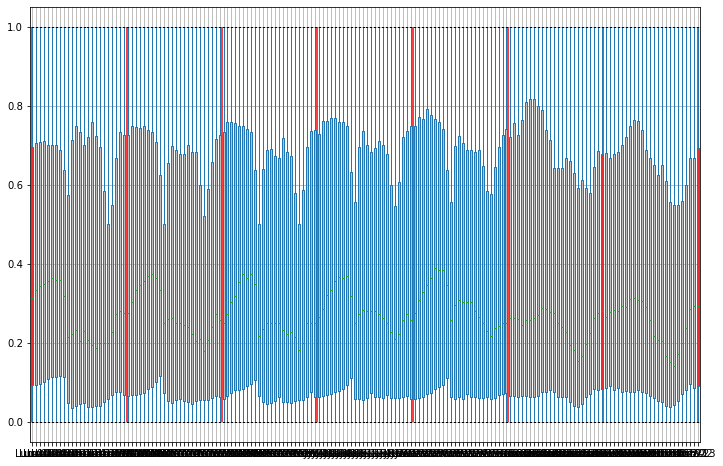

In [ ]:
axes = loading.boxplot(figsize=(12,8))
axes.set_xlabel('')
vlines(x = np.linspace(1, p, 8), ymin = 0, ymax = 1, colors = "red")

#### 3. Plot the average hourly loading for each day (on a single graph).
Comments? 

#### 4. Plot the stations coordinates on a 2D map (latitude versus longitude). Use the package ggmap (function 'qmplot') to visualize the average loading for a given hour (6h, 12h, 23h) as a color scale.
Comments ?

#### 5. Use a different color for stations which are located on a hill. (Use the basis 'plot' function, and the function 'qmplot' of R package ggmap).

#### 6. Redo questions 1-3 for the subset of stations which are located on a hill. Same questions for those who are not. Comment?